In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [2]:
# take the data
data = [line.rstrip() for line in open('/kaggle/input/sms-spam-abi/SMSSpamCollection')]

In [3]:
# Check the data length
len(data)

5574

In [4]:
# try to print the data and check it
print(data[0])

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [5]:
# Create the dataframe
final_data = pd.read_csv('/kaggle/input/sms-spam-abi/SMSSpamCollection', sep = '\t', names = ['labels', 'messages'])
final_data

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# Check the length of each text
df = pd.DataFrame(data = final_data)
df['length'] = df['messages'].apply(len)
df

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [7]:
# Describe the data
df.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [8]:
# Having one text with maximum length
# let's see what is that text

# print the longest message
df[df['length'] == 910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [9]:
# let's see by grouping it
df.groupby('labels').describe()

# so 4825 are ham and 747 are spam

length                                                         
         count        mean        std   min    25%    50%    75%    max
labels                                                                 
ham     4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam     747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

910

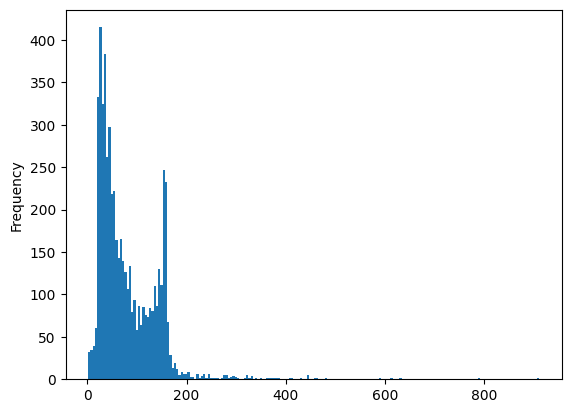

In [10]:
# let's visualise anything can be understand

df['length'].plot.hist(bins = 200)
df['length'].max()

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

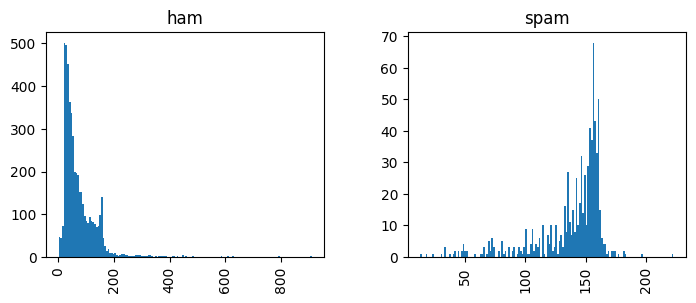

In [11]:
# Spam vs ham

df.hist(column = 'length', by = 'labels', bins =150, figsize = (8,3))

In [12]:
# from this we can understand spam messages are bit long
# define a function
import string
from nltk.corpus import stopwords

def text_process(message):

    no_punc = [char for char in message if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [13]:
df['messages'].head(3)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: messages, dtype: object

In [14]:
five = df['messages'].head(5).apply(text_process)
print(five)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object


In [15]:
df_text = df['messages'].apply(text_process)
print(df_text)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: messages, Length: 5572, dtype: object


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer = text_process)
cv_1 = cv.fit(df['messages'])
print(cv_1)

CountVectorizer(analyzer=<function text_process at 0x79e31dd098a0>)


In [29]:
df['messages'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [30]:
print(type(cv_1.vocabulary_))

<class 'dict'>


In [31]:
len(cv_1.vocabulary_)

11425

In [18]:
# cv_1.vocabulary_{'Go'}

In [32]:
mess4 = df['messages'][4]
print(mess4)

Nah I don't think he goes to usf, he lives around here though


In [33]:
bow4 = cv.transform([mess4])
print(bow4)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 2948)	1
  (0, 4777)	1
  (0, 6123)	1
  (0, 6877)	1
  (0, 7842)	1
  (0, 10433)	1
  (0, 10450)	1
  (0, 10799)	1


In [39]:
three = cv_1.get_feature_names_out()[2948]
three

'Nah'

In [40]:
# for all data we are applying
bow_all = cv.transform(df['messages'])
print(bow_all.shape)

(5572, 11425)


In [58]:
print(bow_all[:1])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1


In [62]:
first_word = cv_1.get_feature_names_out()[2060]
print(first_word)

Go


In [41]:
type(bow_all[:1])

scipy.sparse._csr.csr_matrix

In [42]:
# we got the vocabulary counts and no of occurrences then we need to weight them based on the
# occurrrences
# Tfidftransformer helps it

from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
tfidf = tfidf.fit(bow_all)

In [43]:
tfidf4 = tfidf.transform(bow4)
print(tfidf4)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 10799)	0.4019015462543087
  (0, 10450)	0.35407004444444734
  (0, 10433)	0.27043580251222216
  (0, 7842)	0.4457437273623316
  (0, 6877)	0.35407004444444734
  (0, 6123)	0.24090226292109554
  (0, 4777)	0.3104226271508041
  (0, 2948)	0.4019015462543087


In [46]:
df['messages'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [47]:
message_tfidf = tfidf.transform(bow_all)
print(message_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50548 stored elements and shape (5572, 11425)>
  Coords	Values
  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183


In [55]:
first = tfidf.get_feature_names_out()[10799]
print(first)

x10799


In [53]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model = model.fit(message_tfidf, df['labels'])

In [54]:
prediction = model.predict(bow4)
print(prediction)

['ham']


In [55]:
df.head(4)

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49


In [56]:
# All in single pipeline

from sklearn.pipeline import Pipeline

pipeline = Pipeline([('bow', CountVectorizer(analyzer = text_process)),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', MultinomialNB())])

In [57]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, msg_label, msg_test_label = train_test_split(df['messages'], df['labels'], test_size = 0.3)

In [58]:
print("Train shape :",msg_train.shape)
print("train label : ", msg_label.shape)

Train shape : (3900,)
train label :  (3900,)


In [59]:
pipeline.fit(msg_train, msg_label)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x79eb553c8680>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [60]:
prediction = pipeline.predict(msg_test)

In [61]:
print(prediction.shape)

(1672,)


In [62]:
print(prediction[:5])

['ham' 'ham' 'ham' 'ham' 'ham']


In [63]:
msg_test.head(5)

3252                          I‘ll leave around four, ok?
94      Havent planning to buy later. I check already ...
933                    So do you have samus shoulders yet
4452    And that is the problem. You walk around in "j...
62                              Its a part of checking IQ
Name: messages, dtype: object

In [64]:
msg_train.head(5)

5356                       Tell me something. Thats okay.
704     Thats a bit weird, even ?- where is the do sup...
4373    Ur balance is now £600. Next question: Complet...
4444    You know my old Dom I told you about yesterday...
1075              Aight ill get on fb in a couple minutes
Name: messages, dtype: object

In [65]:
spam = msg_label[msg_label == 'spam']
ham = msg_label[msg_label == 'ham']

print(len(spam))
print(len(ham))

print(msg_label.shape)

520
3380
(3900,)


In [66]:
data = pd.DataFrame(msg_train)
print(data)

                                               messages
5356                     Tell me something. Thats okay.
704   Thats a bit weird, even ?- where is the do sup...
4373  Ur balance is now £600. Next question: Complet...
4444  You know my old Dom I told you about yesterday...
1075            Aight ill get on fb in a couple minutes
...                                                 ...
943   How about getting in touch with folks waiting ...
2209  URGENT!! Your 4* Costa Del Sol Holiday or £500...
625   Nah it's straight, if you can just bring bud o...
5426      Oh yeah! And my diet just flew out the window
3628  Still chance there. If you search hard you wil...

[3900 rows x 1 columns]
